In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Trends with the SAGE II / OSIRIS / OMPS-LP Dataset

Here we calculate trends using the SAGE II / OSIRIS / OMPS-LP dataset by regressing to deseasonalized relative monthly zonal mean anomalies

In [2]:
import xarray as xr
import numpy as np
from LOTUS_regression.regression import regress_all_bins
from LOTUS_regression.predictors import load_data

The data is in a single NetCDF4 file.

In [3]:
MERGED_FILE = r'/home/runner/work/lotus-regression/lotus-regression/test_data//S2_OS_OMPS/MERGED_LOTUS.nc'

mzm_data = xr.open_dataset(MERGED_FILE, engine='netcdf4')

print(mzm_data)

<xarray.Dataset>
Dimensions:           (altitude: 59, time: 387, mean_latitude: 13, month: 12)
Coordinates:
  * altitude          (altitude) float64 0.0 1.0 2.0 3.0 ... 55.0 56.0 57.0 58.0
  * time              (time) datetime64[ns] 1984-10-01 1984-11-01 ... 2016-12-01
    latitude_bin      (mean_latitude) object ...
  * mean_latitude     (mean_latitude) float64 -60.0 -50.0 -40.0 ... 50.0 60.0
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    anomaly           (mean_latitude, time, altitude) float64 ...
    relative_anomaly  (mean_latitude, time, altitude) float64 ...
    std               (mean_latitude, time, altitude) float64 ...
    relative_std      (mean_latitude, time, altitude) float64 ...
    count             (mean_latitude, time, altitude) float64 ...
    osiris_mzm        (mean_latitude, month, altitude) float64 ...
    sageii_mzm        (mean_latitude, month, altitude) float64 ...
    omps_mzm          (mean_latitude, month, altitude) float

In [4]:
predictors = load_data('pred_baseline_pwlt.csv')

print(predictors.columns)

Index(['enso', 'solar', 'qboA', 'qboB', 'aod', 'linear_pre', 'linear_post',
       'constant'],
      dtype='object')


In [5]:
results = regress_all_bins(predictors, mzm_data['relative_anomaly'], tolerance=0.1)

# Convert to ~ percent
results *= 100

print(results)

<xarray.Dataset>
Dimensions:          (mean_latitude: 13, altitude: 59)
Coordinates:
  * mean_latitude    (mean_latitude) float64 -60.0 -50.0 -40.0 ... 50.0 60.0
  * altitude         (altitude) float64 0.0 1.0 2.0 3.0 ... 55.0 56.0 57.0 58.0
Data variables: (12/16)
    enso             (mean_latitude, altitude) float64 nan nan ... 1.132 0.7805
    enso_std         (mean_latitude, altitude) float64 nan nan ... 0.4722 0.4676
    solar            (mean_latitude, altitude) float64 nan nan ... 0.4617 0.7597
    solar_std        (mean_latitude, altitude) float64 nan nan ... 0.7352 0.7282
    qboA             (mean_latitude, altitude) float64 nan nan ... -0.4209
    qboA_std         (mean_latitude, altitude) float64 nan nan ... 0.4594 0.456
    ...               ...
    linear_pre       (mean_latitude, altitude) float64 nan nan ... 3.14e-15
    linear_pre_std   (mean_latitude, altitude) float64 nan nan ... 5.111e-15
    linear_post      (mean_latitude, altitude) float64 nan nan ... 3.783 3.06

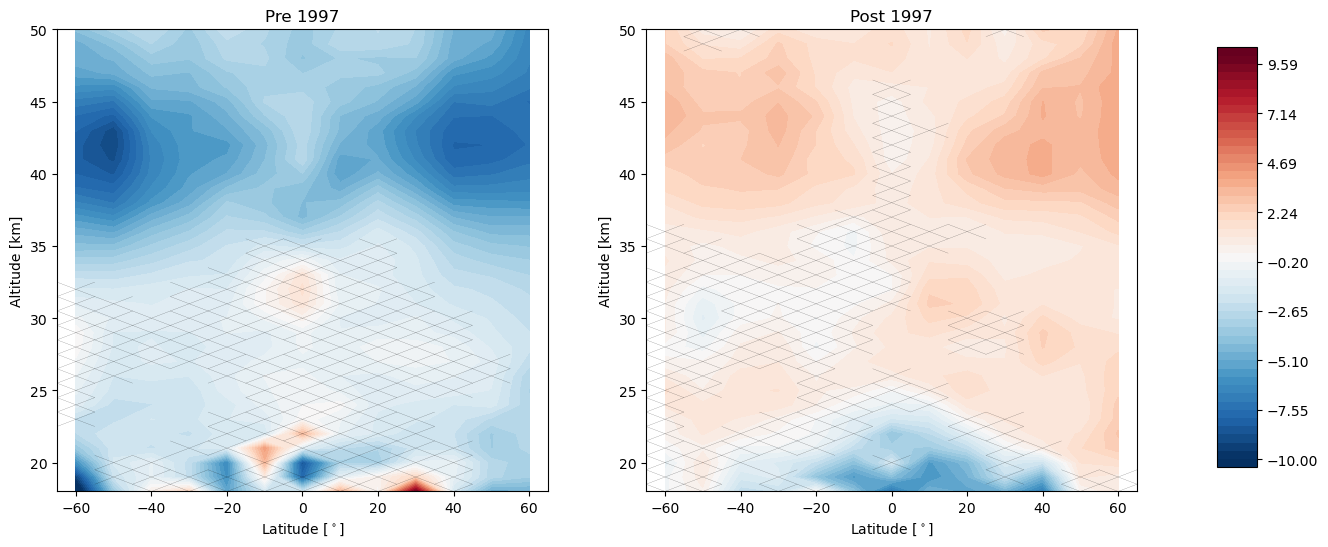

In [6]:
import LOTUS_regression.plotting.trends as trends
trends.pre_post_with_confidence(results, x='mean_latitude', y='altitude', ylim=(18, 50), log_y=False, figsize=(16, 6),
                                x_label='Latitude [$^\circ$]', y_label='Altitude [km]', pre_title='Pre 1997',
                                post_title='Post 1997')